In [1]:
import tensorflow as tf
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tensorflow.keras as keras

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(45000, 28, 28)

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

def exponential_decay(lr0, mult):
    def exponential_decay_fn(epoch):
        return lr0 *  mult**epoch
    return exponential_decay_fn

mult = np.exp(np.log(1e6)/50)
exponential_decay_fn = exponential_decay(lr0=1e-5, mult=mult)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [54]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, validation_data=[X_valid, y_valid], callbacks=[ lr_scheduler])

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 5s 118us/sample - loss: 14.5959 - acc: 0.5154 - val_loss: 5.6116 - val_acc: 0.7013
Epoch 2/50
45000/45000 [==============================] - 5s 113us/sample - loss: 3.9902 - acc: 0.7714 - val_loss: 3.0043 - val_acc: 0.8085
Epoch 3/50
45000/45000 [==============================] - 5s 113us/sample - loss: 2.3215 - acc: 0.8426 - val_loss: 1.9832 - val_acc: 0.8550
Epoch 4/50
45000/45000 [==============================] - 5s 113us/sample - loss: 1.5133 - acc: 0.8803 - val_loss: 1.4683 - val_acc: 0.8815
Epoch 5/50
45000/45000 [==============================] - 5s 113us/sample - loss: 1.0215 - acc: 0.9059 - val_loss: 1.1630 - val_acc: 0.9014
Epoch 6/50
45000/45000 [==============================] - 5s 113us/sample - loss: 0.7016 - acc: 0.9271 - val_loss: 1.0065 - val_acc: 0.9091
Epoch 7/50
45000/45000 [==============================] - 5s 113us/sample - loss: 0.4840 - acc: 0.9408 - val_

In [58]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

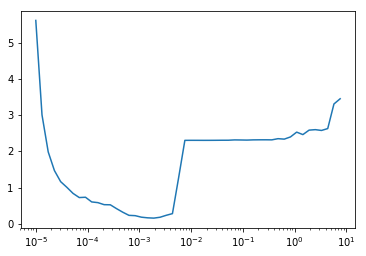

In [59]:
plot(history.history['lr'], history.history['val_loss'])
ax = gca()
ax.set_xscale("log")

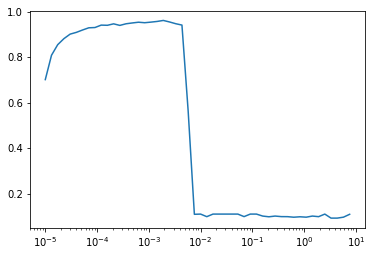

In [60]:
plot(history.history['lr'], history.history['val_acc'])
ax = gca()
ax.set_xscale("log")

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=2e-4), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_valid, y_valid], callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 13s 286us/sample - loss: 0.3906 - acc: 0.8882 - val_loss: 0.5084 - val_acc: 0.9262
Epoch 2/100
45000/45000 [==============================] - 8s 168us/sample - loss: 0.2270 - acc: 0.9349 - val_loss: 0.4558 - val_acc: 0.9398
Epoch 3/100
45000/45000 [==============================] - 8s 168us/sample - loss: 0.1698 - acc: 0.9516 - val_loss: 0.4258 - val_acc: 0.9458
Epoch 4/100
45000/45000 [==============================] - 8s 167us/sample - loss: 0.1348 - acc: 0.9604 - val_loss: 0.3784 - val_acc: 0.9509
Epoch 5/100
45000/45000 [==============================] - 8s 168us/sample - loss: 0.1097 - acc: 0.9675 - val_loss: 0.4757 - val_acc: 0.9531
Epoch 6/100
45000/45000 [==============================] - 8s 168us/sample - loss: 0.0919 - acc: 0.9729 - val_loss: 0.6907 - val_acc: 0.9579
Epoch 7/100
45000/45000 [==============================] - 8s 168us/sample - loss: 0.0790 - acc: 0.9759

In [10]:
1*(model.predict_classes(X_valid) == y_valid).mean()

0.9509333333333333

In [11]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.3398 - acc: 0.9547


[0.3398294435672462, 0.9547]

In [12]:
def build_model(n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[28, 28]))
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(n_neurons, kernel_initializer="he_normal", use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
    model.add(keras.layers.Dense(n_neurons, kernel_initializer="he_normal", use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))

    model.add(keras.layers.Dense(10, activation="softmax"))
              
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

In [13]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [14]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {

    "n_neurons": np.arange(100, 1000),
    "learning_rate": reciprocal(1e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=10, cv=2)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 22500 samples, validate on 15000 samples
Epoch 1/50
22500/22500 [==============================] - 5s 215us/sample - loss: 0.3658 - acc: 0.8889 - val_loss: 0.3951 - val_acc: 0.9315
Epoch 2/50
22500/22500 [==============================] - 4s 195us/sample - loss: 0.2111 - acc: 0.9356 - val_loss: 0.4968 - val_acc: 0.9382
Epoch 3/50
22500/22500 [==============================] - 4s 195us/sample - loss: 0.1608 - acc: 0.9503 - val_loss: 0.5438 - val_acc: 0.9430
Epoch 4/50
22500/22500 [==============================] - 4s 195us/sample - loss: 0.1211 - acc: 0.9607 - val_loss: 0.5563 - val_acc: 0.9525
Epoch 5/50
22500/22500 [==============================] - 4s 195us/sample - loss: 0.1078 - acc: 0.9654 - val_loss: 0.8727 - val_acc: 0.9469
Epoch 6/50
22500/22500 [==============================] - 4s 195us/sample - loss: 0.0874 - acc: 0.9706 - val_loss: 0.8461 - val_acc: 0.9453
Epoch 7/50
22500/22500 [==============================] - 4s 195us/sample - loss: 0.0772 - acc: 0.9746 - val_l

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f5f8c0b2668>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5f9c388470>,
                                        'n_neurons': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 1...
       932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944,
       945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957,
       958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970,
       971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983,
       984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996,
       997, 998, 999])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbo

In [15]:
rnd_search_cv.best_score_

0.9572444558143616